# Pymaceuticals Inc.
---

### Analysis

- The first conclusion that we can make by observing the information is that the largest tumor is that of the drug regimen Ketapril with a mean of 55.235638 and on the contrary the minimum is that of the drug Ramicane with 40.216745.
- Another conclusion looking at the bar graph is that the drug regimen Capomulin is the one that has the greatest number of mouse timepoints, and on the contrary, the one that has the least amount of mouse timepoints is Propriva.
- And finally it can be concluded that they used more male mice with 51% while the female ones are 49%.
 

In [361]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [362]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(num_mice)

249


In [363]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_rows = combined_data.duplicated(subset=["Mouse ID", "Timepoint"])
duplicates = combined_data[duplicate_rows]["Mouse ID"].unique()
result_array = pd.Series([duplicates], dtype=object).to_numpy()
print(result_array)

[array(['g989'], dtype=object)]


In [364]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_data[combined_data["Mouse ID"].isin(duplicates)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [365]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_rows = combined_data.duplicated(subset=["Mouse ID"])
non_duplicate_rows = ~duplicate_rows
cleaned_mouse_metadata = combined_data[combined_data["Mouse ID"] != "g989"].drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleaned_mouse_metadata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [366]:
# Checking the number of mice in the clean DataFrame.
num_mice = cleaned_mouse_metadata["Mouse ID"].nunique()
num_mice

248

## Summary Statistics

In [367]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = cleaned_mouse_metadata.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = cleaned_mouse_metadata.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_volume = cleaned_mouse_metadata.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = cleaned_mouse_metadata.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = cleaned_mouse_metadata.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({
    'mean': mean_tumor_volume,
    'median': median_tumor_volume,
    'variance': variance_tumor_volume,
    'std': std_dev_tumor_volume,
    'sem': sem_tumor_volume
})
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'variance': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [368]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = cleaned_mouse_metadata.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

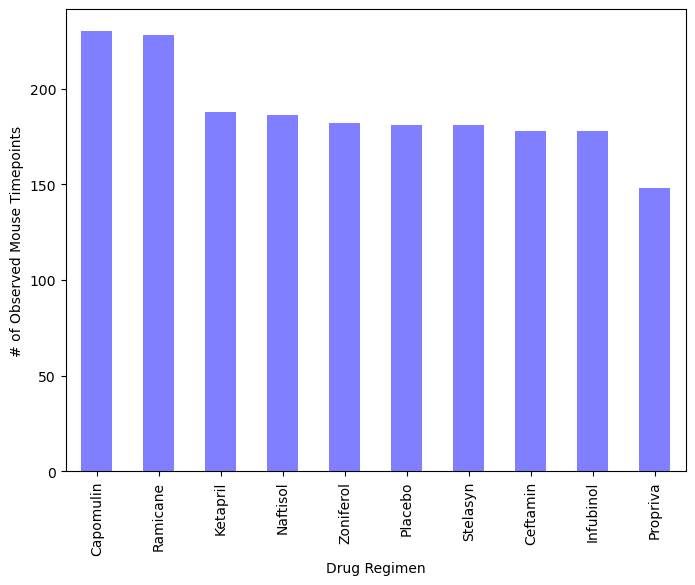

In [369]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = cleaned_mouse_metadata.groupby("Drug Regimen").size()
regimen_counts = regimen_counts.sort_values(ascending=False)
regimen_counts.plot(kind="bar", color="blue", alpha=0.5, figsize=(8, 6))

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

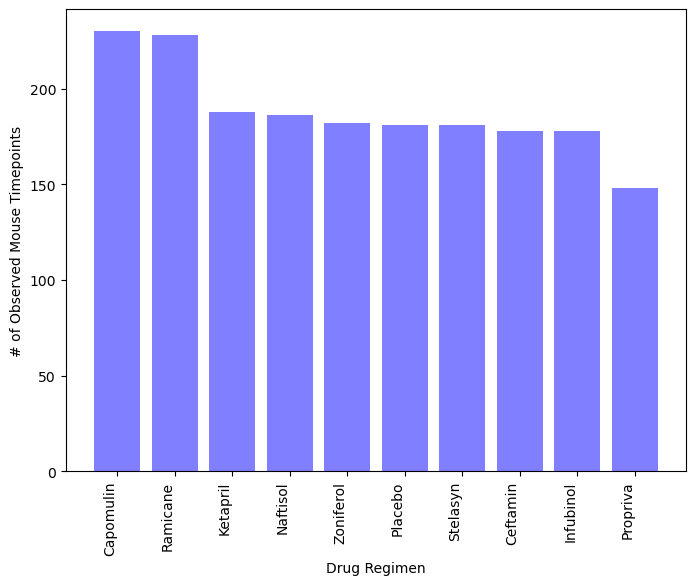

In [370]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_counts = cleaned_mouse_metadata.groupby("Drug Regimen").size()

regimen_counts = regimen_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(regimen_counts.index, regimen_counts, color="blue", alpha=0.5)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.xticks(rotation=90, ha="right")

plt.show()

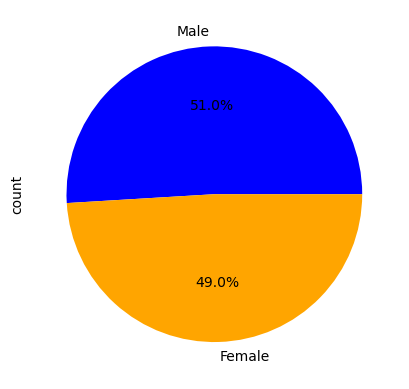

In [371]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_distribution = cleaned_mouse_metadata["Sex"].value_counts()

gender_distribution.plot.pie( autopct="%1.1f%%", colors=["blue","orange"], subplots=True)


plt.show()

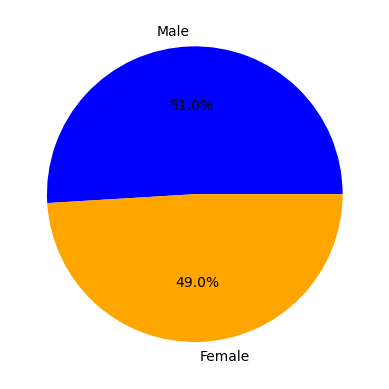

In [372]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_distribution = cleaned_mouse_metadata["Sex"].value_counts()


labels = gender_distribution.index
sizes = gender_distribution.values
colors = ["blue","orange"]


plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")


plt.show()

## Quartiles, Outliers and Boxplots

In [373]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

last_timepoints = cleaned_mouse_metadata.groupby("Mouse ID")["Timepoint"].max()

last_timepoints_df = pd.DataFrame({"Timepoint": last_timepoints}).reset_index()

final_tumor_volume = pd.merge(last_timepoints_df, cleaned_mouse_metadata, on=["Mouse ID", "Timepoint"])

final_tumor_volume_selected_regimens = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(selected_regimens)]

In [374]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for treatment in treatments:
    subset_data = final_tumor_volume_selected_regimens[final_tumor_volume_selected_regimens["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    quartiles = subset_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    outliers = subset_data[(subset_data < lower_bound) | (subset_data > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers.to_string(index=False)}, Name: Tumor Volume (mm3), dtype: float64")

Capomulin's potential outliers: Series([], ), Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: Series([], ), Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: 36.321346, Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], ), Name: Tumor Volume (mm3), dtype: float64


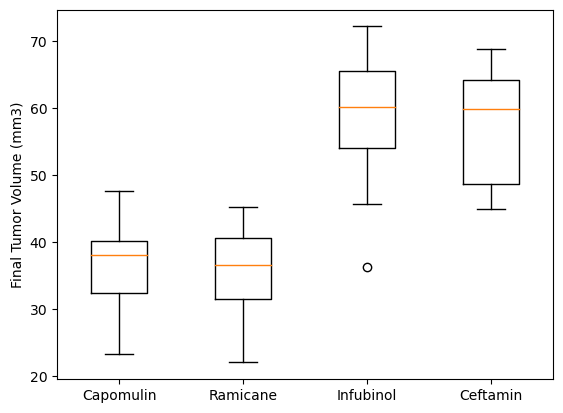

In [375]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()

data = [final_tumor_volume_selected_regimens[final_tumor_volume_selected_regimens["Drug Regimen"] == treatment]["Tumor Volume (mm3)"] for treatment in treatments]

ax.boxplot(data, labels=treatments)

ax.set_ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

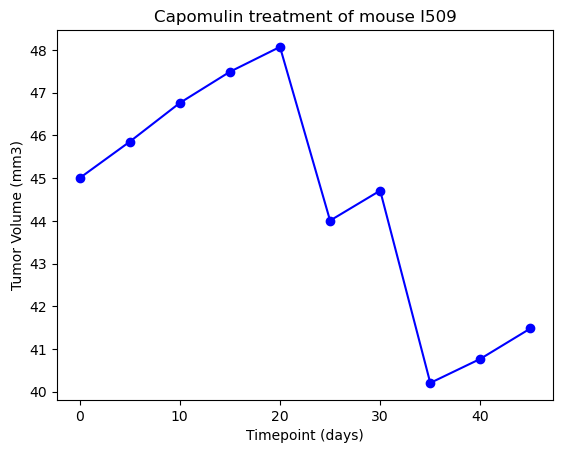

In [376]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = "l509"
mouse_data = cleaned_mouse_metadata[cleaned_mouse_metadata["Mouse ID"] == mouse_id]

plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', color='b', label=f"Mouse {mouse_id}")

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse I509")

plt.show()

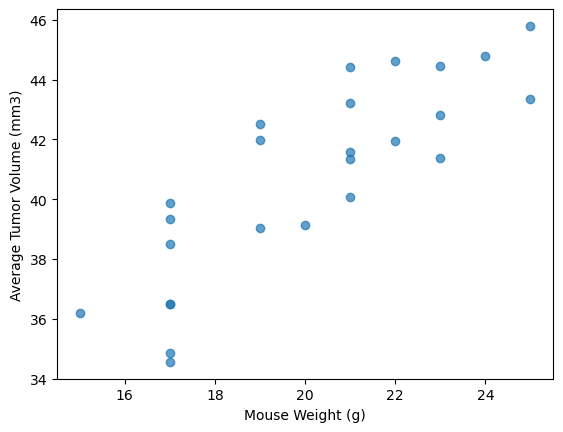

In [377]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = cleaned_mouse_metadata[cleaned_mouse_metadata["Drug Regimen"] == 'Capomulin']
capomulin_table = capomulin_data[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]

average_tumor_volume = capomulin_table.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

average_tumor_volume_df = pd.DataFrame({'Average Tumor Volume (mm3)': average_tumor_volume})

merged_data = pd.merge(capomulin_table, average_tumor_volume_df, on='Mouse ID')

unique_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Average Tumor Volume (mm3)', 'Weight (g)'])

mouse_weights = unique_data['Weight (g)']
average_tumor_volumes = unique_data['Average Tumor Volume (mm3)']

plt.scatter(mouse_weights, average_tumor_volumes, marker='o', alpha=0.7)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


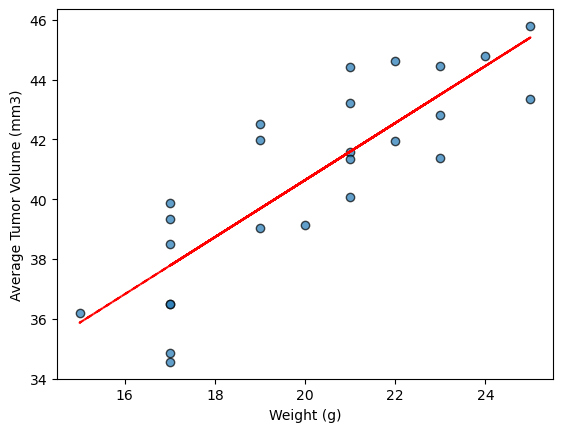

In [378]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


unique_data.loc[:, 'Weight (g)'] = pd.to_numeric(unique_data['Weight (g)'], errors='coerce')
unique_data.loc[:, 'Average Tumor Volume (mm3)'] = pd.to_numeric(unique_data['Average Tumor Volume (mm3)'], errors='coerce')
unique_data = unique_data.dropna(subset=['Weight (g)', 'Average Tumor Volume (mm3)'])

mouse_weights = unique_data['Weight (g)'].values
average_tumor_volumes = unique_data['Average Tumor Volume (mm3)'].values

correlation_coefficient, _ = st.pearsonr(mouse_weights, average_tumor_volumes)
print(f"The correlation between mouse weight and the average tumor volume is: {correlation_coefficient:.2f}")

model = st.linregress(mouse_weights, average_tumor_volumes)

slope = model.slope
intercept = model.intercept

predicted_values = slope * mouse_weights + intercept

plt.scatter(mouse_weights, average_tumor_volumes, marker='o', edgecolors='black', alpha=0.7)
plt.plot(mouse_weights, predicted_values, color='red', linestyle='--')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()